In [1]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
plate_id = "310_20230830"
plate_id_video = "20230904_Plate310"
videos_folder = "/projects/0/einf914/videos/"


In [3]:
indexes = {
"20230901_Plate310" : 20,
"20230902_Plate310" : 33,
"20230903_Plate310" : 42,
"20230904_Plate310" : 52,
"20230905_Plate310" : 64,
# "20230906_Plate310" : 73,
}
indexes = {
# "20230810_Plate441" : 29,
"20230811_Plate441" : 41,
"20230812_Plate441" : 47,
"20230813_Plate441" : 60,
}

In [4]:
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            all_infos = pd.concat([all_infos,edge_data_csv])
#             save_path = os.path.join(analysis_folder,vid_obj.dataset['folder'],"arrows")

#             vid_obj.plot_speed_arrows(plot_both=True, video_txt_size=15,
#                                       save_im = save_path
#                                      )
#             save_path = os.path.join(analysis_folder,vid_obj.dataset['folder'],"flux")

#             vid_obj.plot_speed_arrows(plot_both=False, video_txt_size=15,
#                                       plot_flux = True,
#                                       significance_thresh = 0,
#                                       plot_text = False,
#                                       save_im = save_path
#                                      )
    # break

20230811_Plate441
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230811_Plate441\043\Img\edges_data.csv. Check analysis for 20230811_Plate441_043
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230811_Plate441\044\Img\edges_data.csv. Check analysis for 20230811_Plate441_044
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230811_Plate441\059\Img\edges_data.csv. Check analysis for 20230811_Plate441_059
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230811_Plate441\060\Img\edges_data.csv. Check analysis for 20230811_Plate441_060
20230812_Plate441
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230812_Plate441\053\Img\edges_data.csv. Check analysis for 20230812_Plate441_053

In [5]:
all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
all_infos['load2'] = all_infos['betweenness_derivative']/all_infos['width_automate']**2

all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

In [6]:
all_infos['aligned'] = -np.sign(all_infos['betweenness_derivative']*all_infos['flux_avg'])
all_infos['aligned2'] = np.sign(all_infos['flux_avg'])

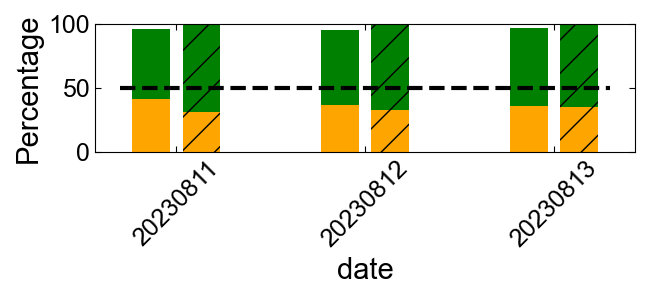

In [22]:
# Assuming 'select' is your DataFrame filtered based on previous conditions.
plate_ids = all_infos['plate_id'].unique()
plate_ids_names = [plate_id.split("_")[0] for plate_id in plate_ids]
num_plate_ids = len(plate_ids)

# Prepare figure
fig, ax = plt.subplots(figsize=(10/2 + num_plate_ids/2, 3))  # Adjust figure size based on the number of plate_ids

# Bar plot settings
bar_width = 0.2
index = np.arange(num_plate_ids)
color_1 = 'orange'
color_2 = 'green'

# Initialize containers for bar positions and heights
positions_1 = []
positions_2 = []
heights_1 = []
heights_2 = []

# Loop through each plate_id to get proportions
for i, plate_id in enumerate(plate_ids):
    subset = all_infos[all_infos['plate_id'] == plate_id]
    subset = subset[(subset['coverage_tot'] > 0.05) & 
               (subset['speed_right'] <= 15) & 
               (subset['mode'] <= "F") & 
               (subset['mapping_quality'] <= 15) 
                    
                   ]
    aligned_counts = subset['aligned'].value_counts(normalize=True).reindex([-1, 1], fill_value=0) * 100
    aligned2_counts = subset['aligned2'].value_counts(normalize=True).reindex([-1, 1], fill_value=0) * 100
    
    # Plot bars for this plate_id
    pos_1 = index[i] - bar_width/1.5
    pos_2 = index[i] + bar_width/1.5
    
    positions_1.append(pos_1)
    positions_2.append(pos_2)
    heights_1.extend([aligned_counts[-1], aligned_counts[1]])
    heights_2.extend([aligned2_counts[-1], aligned2_counts[1]])
    
    ax.bar(pos_1, aligned_counts[-1], bar_width, label='-1 in Aligned' if i == 0 else "", color=color_1)
    ax.bar(pos_1, aligned_counts[1], bar_width, bottom=aligned_counts[-1], label='1 in Aligned' if i == 0 else "", color=color_2)
    
    ax.bar(pos_2, aligned2_counts[-1], bar_width, label='-1 in Aligned2' if i == 0 else "", color=color_1,hatch = "/")
    ax.bar(pos_2, aligned2_counts[1], bar_width, bottom=aligned2_counts[-1], label='1 in Aligned2' if i == 0 else "", color=color_2,hatch = "/")

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('date')
ax.set_ylabel('Percentage')
# ax.set_title('Proportion of -1 and 1 in Aligned and Aligned2 by Plate ID')
ax.set_xticks(index)
ax.set_xticklabels(plate_ids_names, rotation=45)
ax.set_ylim(0, 100)
ax.hlines(50,-bar_width*1.5,len(index)-1+bar_width*1.5,color="black",linestyle="dashed")
# ax.legend()

plt.tight_layout()
plt.show()

(array([368., 104.,  88.,  49.,  29.,  15.,  17.,  10.,  13.,   4.,  15.,
          8.,   8.,  14.,   8.,   5.,   9.,  14.,   5.,   6.,  10.,  12.,
         13.,  14.,   0.,   4.,  27.,   3.,  11.,   6.]),
 array([ 0.1217943 ,  3.3748243 ,  6.6278543 ,  9.88088429, 13.13391429,
        16.38694428, 19.63997428, 22.89300428, 26.14603427, 29.39906427,
        32.65209427, 35.90512426, 39.15815426, 42.41118425, 45.66421425,
        48.91724425, 52.17027424, 55.42330424, 58.67633423, 61.92936423,
        65.18239423, 68.43542422, 71.68845422, 74.94148421, 78.19451421,
        81.44754421, 84.7005742 , 87.9536042 , 91.20663419, 94.45966419,
        97.71269419]),
 <BarContainer object of 30 artists>)

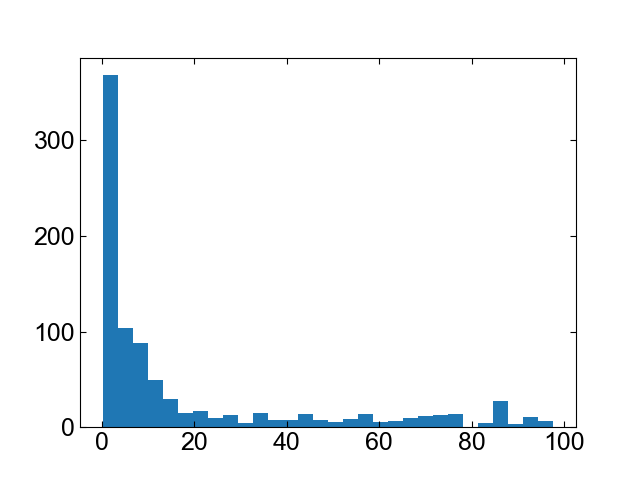

In [21]:
fig,ax = plt.subplots()
select = all_infos[all_infos['mapping_quality']<=100]
ax.hist(select['mapping_quality'],30)

In [8]:
all_infos['speed_tip'] = np.where(all_infos['betweenness_derivative'] > 0, all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_root'] = np.where(all_infos['betweenness_derivative'] >  0, all_infos['speed_right'], all_infos['speed_left'])


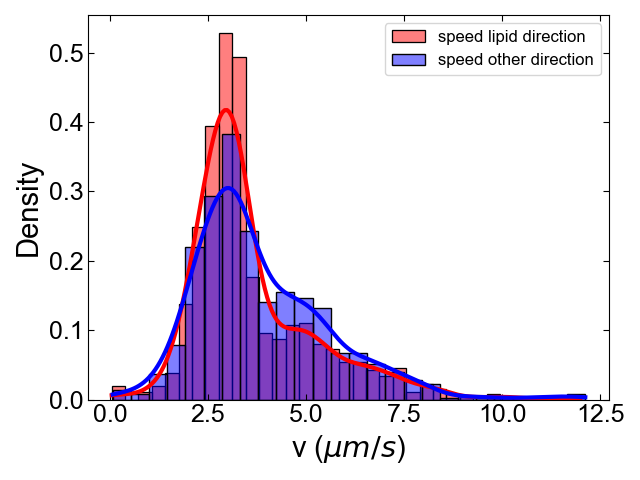

In [9]:
fig,ax = plt.subplots()
select = all_infos[all_infos['mode']=="BF"]

select = select[select['coverage_tot']>0.05]

sns.histplot(np.abs(select['speed_tip']),color='red',stat="density",kde=True,label = "speed lipid direction")
sns.histplot(np.abs(select['speed_root']),color='blue',stat="density",kde=True,label = "speed other direction")
ax.legend(fontsize='large')
ax.set_xlabel("v ($\mu m/s$)")
plt.tight_layout()

<AxesSubplot: >

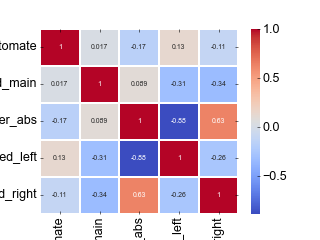

In [38]:
fig,ax = plt.subplots()
all_infos_sub = all_infos[all_infos['plate_id']=='20230903_Plate310']

select = all_infos_sub[all_infos_sub['mode']=="BF"]

select = select[select['coverage_tot']>0.05]

# sns.scatterplot(select,x='load2',y="speed_right",alpha = 1)
# sns.scatterplot(select,x='load2',y="speed_left",alpha = 1)
selected_columns = select[['width_automate','load2','betweenness_derivative','speed_left', 'speed_right']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)